In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
train_datagen = ImageDataGenerator(rescale =1.0/255.0)

In [3]:
train_data_path = "train/train"

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_data_path, 
                                                   target_size = (150,150),
                                                    color_mode = 'rgb',
                                                   batch_size = batch_size,
                                                   class_mode='categorical')


Found 25000 images belonging to 2 classes.


In [4]:
base_model = tf.keras.applications.vgg16.VGG16(weights = 'imagenet', input_shape=(150,150,3), include_top = False)

In [5]:
model = tf.keras.Sequential()
for layer in base_model.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)       2

In [6]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [9]:
len(train_generator)

782

In [10]:
for layer in model.layers:
    layer.trainable = True

In [11]:
with tf.device("/gpu:0"):
    history = model.fit(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 20)

Epoch 1/20
781/781 [==============================] - 96s 122ms/step - loss: 0.2355 - acc: 0.9038
Epoch 2/20
781/781 [==============================] - 94s 121ms/step - loss: 0.2071 - acc: 0.9193
Epoch 3/20
781/781 [==============================] - 95s 122ms/step - loss: 0.1843 - acc: 0.9281
Epoch 4/20
781/781 [==============================] - 94s 120ms/step - loss: 0.1651 - acc: 0.9357
Epoch 5/20
781/781 [==============================] - 94s 120ms/step - loss: 0.1491 - acc: 0.9455
Epoch 6/20
781/781 [==============================] - 94s 121ms/step - loss: 0.1298 - acc: 0.9512
Epoch 7/20
781/781 [==============================] - 93s 119ms/step - loss: 0.1109 - acc: 0.9622
Epoch 8/20
781/781 [==============================] - 94s 120ms/step - loss: 0.0943 - acc: 0.9685
Epoch 9/20
781/781 [==============================] - 92s 118ms/step - loss: 0.0791 - acc: 0.9742
Epoch 10/20
781/781 [==============================] - 97s 124ms/step - loss: 0.0677 - acc: 0.9776
Epoch 11/20
781/781

In [4]:
model.save("cats_vs_dogs_model")
model = tf.keras.models.load_model("cats_vs_dogs_model")

In [39]:
x = train_generator[10][0][6]

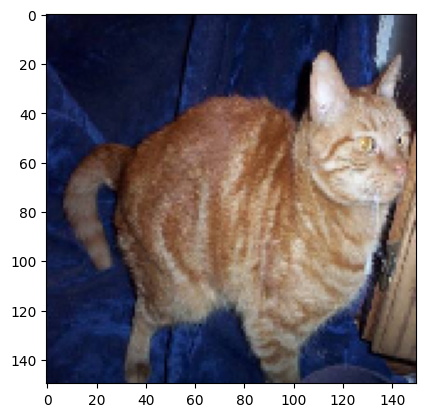

In [40]:
plt.imshow(x)
plt.show()

In [41]:
import numpy as np

In [42]:
pred = model.predict(x.reshape(1,150,150,3))

1/1 [==============================] - 0s 22ms/step


In [43]:
np.argmax(pred)

0

In [44]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [45]:
x = x/255
x = x.reshape(1,150,150,3)

In [46]:
activation_layers = activation.predict(x)

1/1 [==============================] - 0s 65ms/step


In [68]:
first_layer_activation = activation_layers[0]
print(first_layer_activation.shape)

(1, 75, 75, 128)


In [ ]:
plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(first_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

In [61]:
second_layer_activation = activation_layers[1]

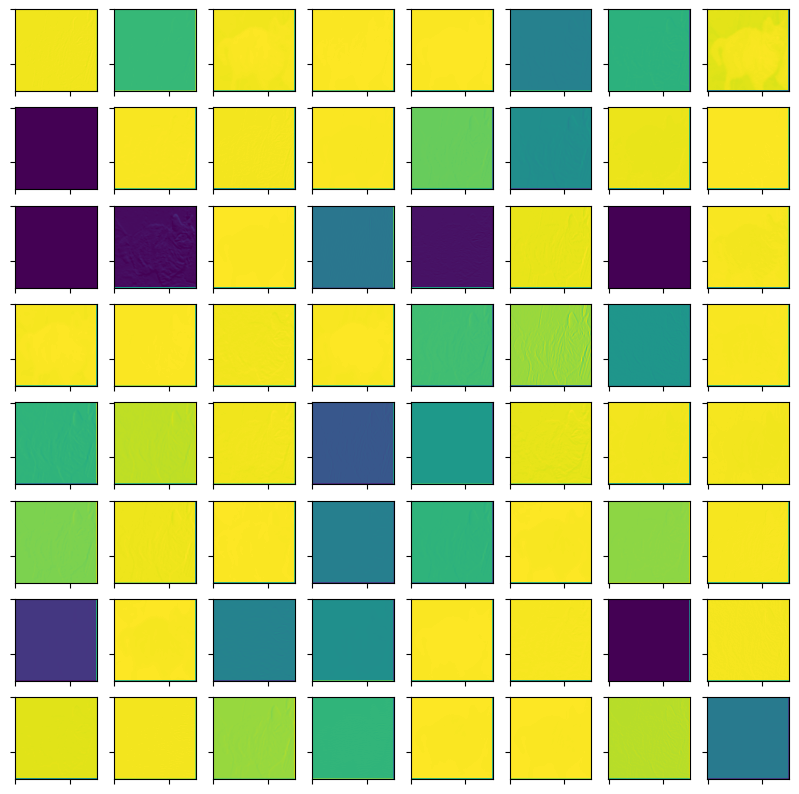

In [62]:
plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(second_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

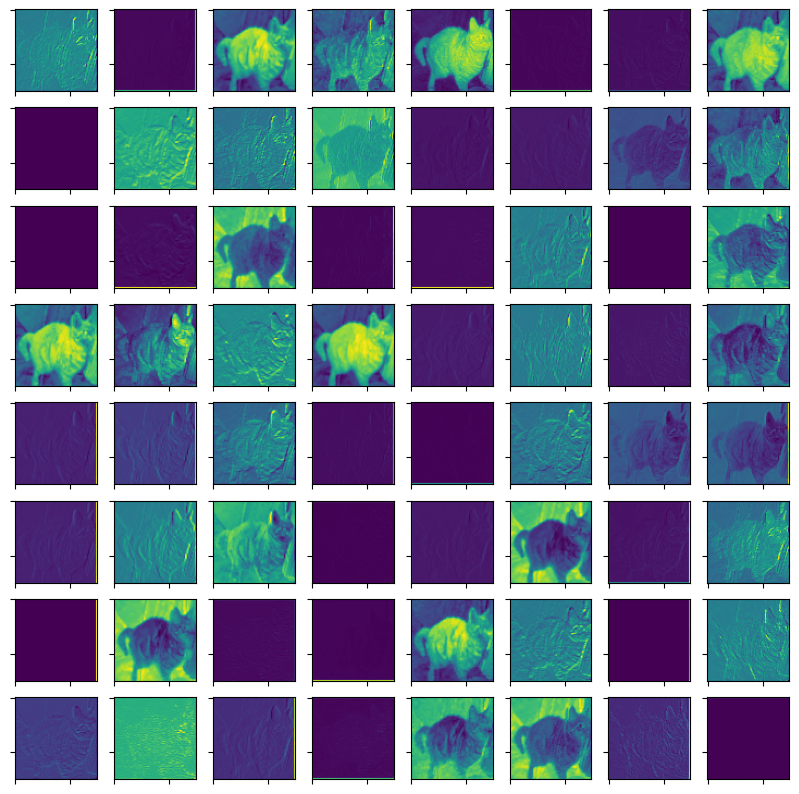

In [63]:
third_layer_activation = activation_layers[2]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

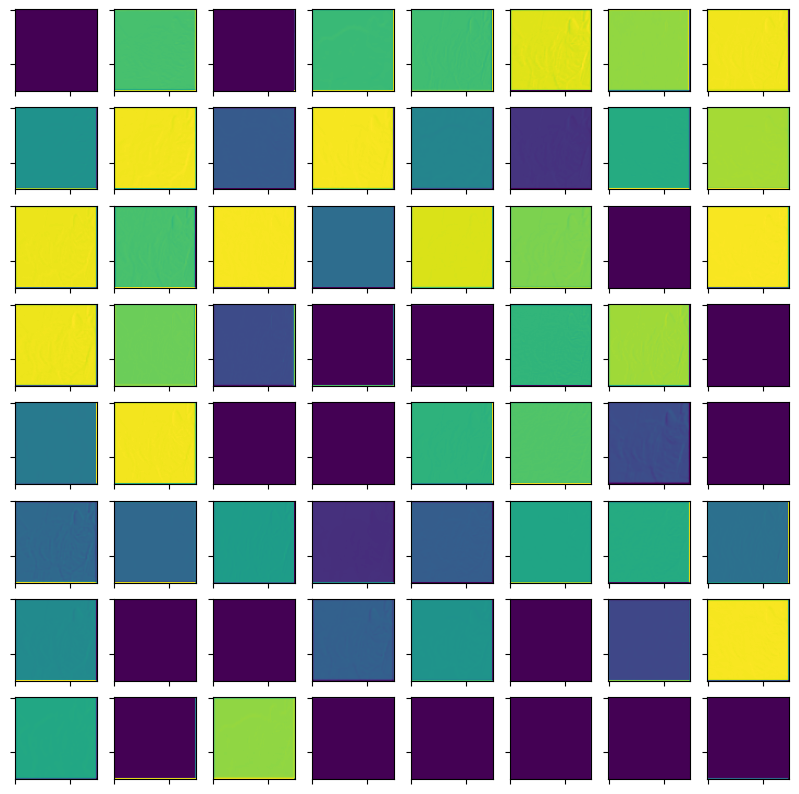

In [64]:
third_layer_activation = activation_layers[3]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

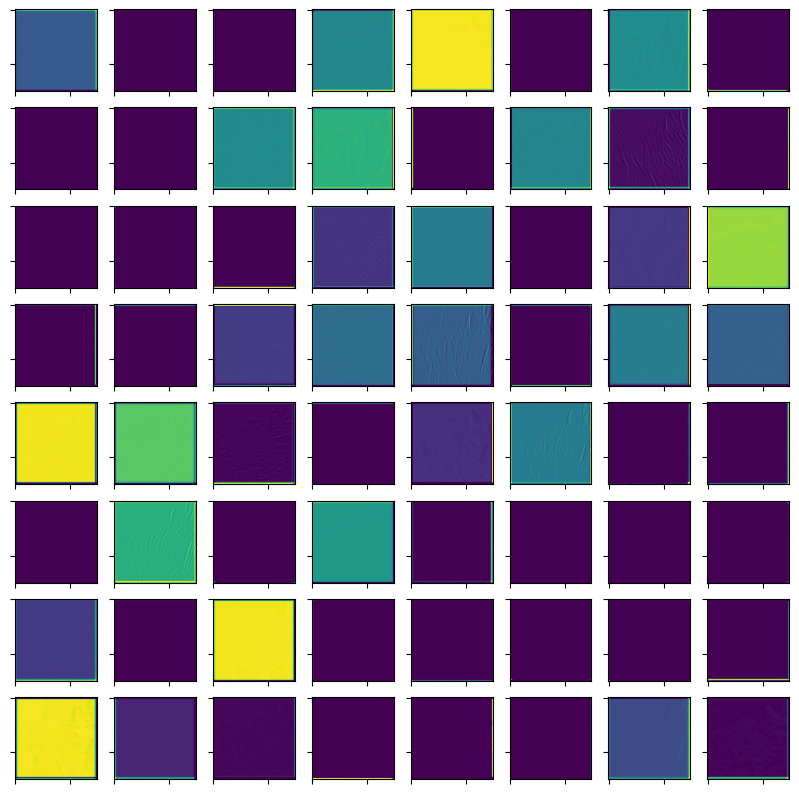

In [65]:
third_layer_activation = activation_layers[4]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

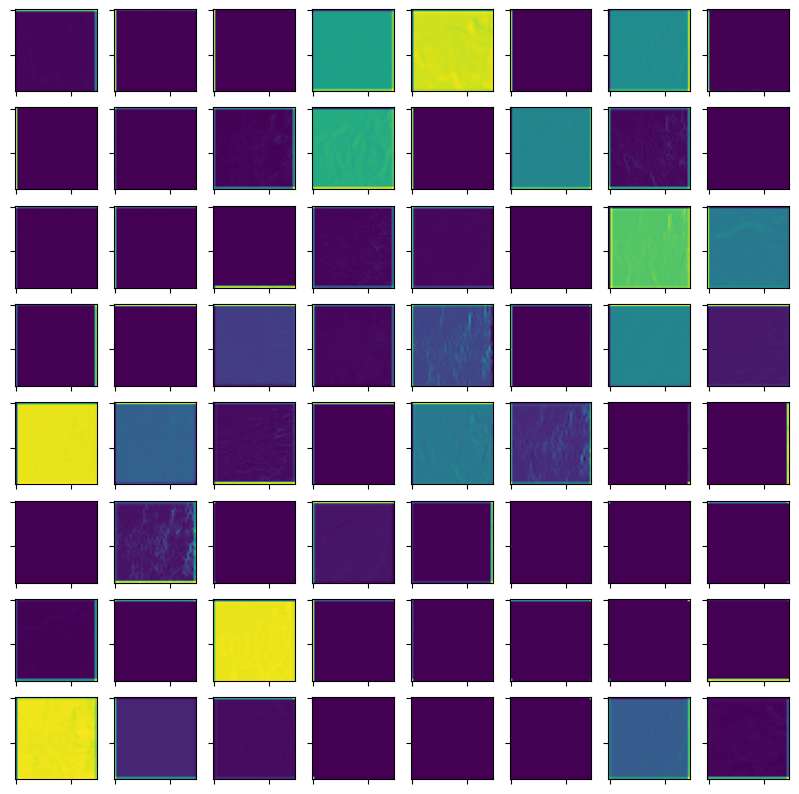

In [66]:
third_layer_activation = activation_layers[5]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

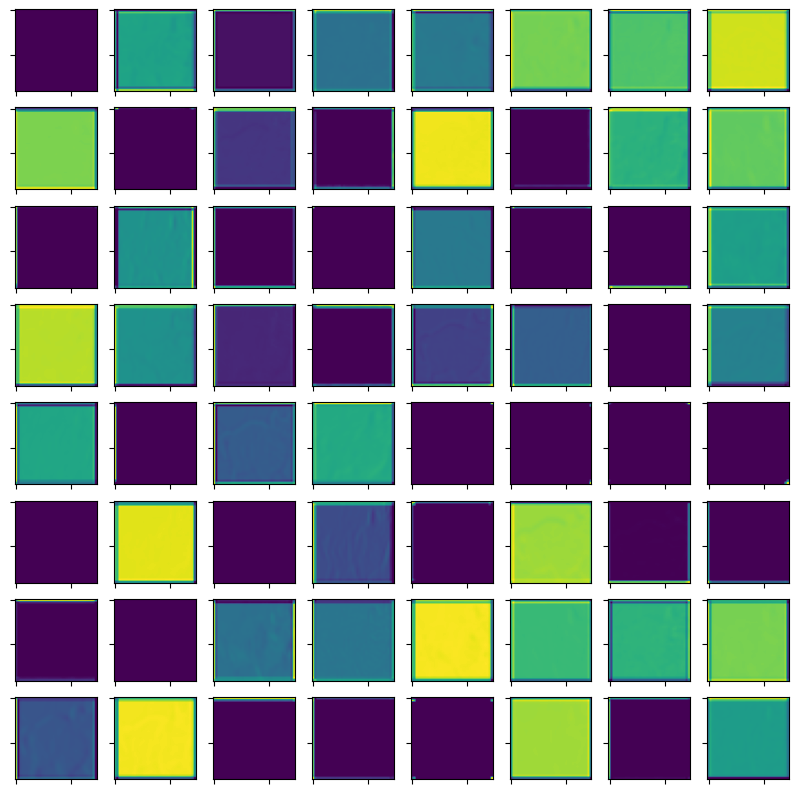

In [67]:
third_layer_activation = activation_layers[6]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()

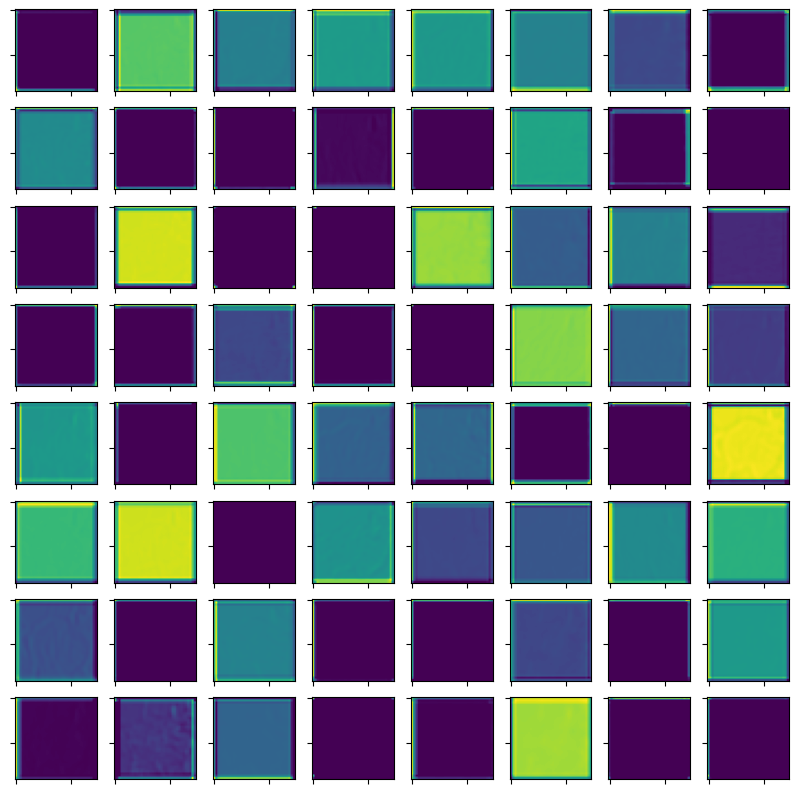

In [56]:
third_layer_activation = activation_layers[7]

plt.figure(figsize=(10,10)) 

for i in range(64):
    plt.subplot(8,8,i+1)    
    plt.imshow(third_layer_activation[0,:,:,i])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

plt.show()